In [4]:
from sqlalchemy import create_engine, text
import pandas as pd

In [5]:
username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "wine_db"

In [6]:
engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

In [7]:
from sqlalchemy import create_engine

username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "wine"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

conn = engine.connect()
print("Connected successfully")
conn.close()


Connected successfully


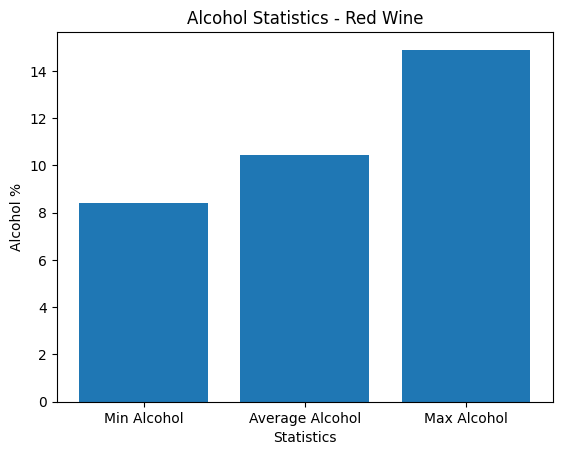

In [10]:
from sqlalchemy import text
import matplotlib.pyplot as plt

with engine.connect() as conn:
    stats = conn.execute(
        text("""
        SELECT
            MIN(alcohol) AS min_alcohol,
            MAX(alcohol) AS max_alcohol,
            AVG(alcohol) AS avg_alcohol
        FROM wine_red
        """)
    ).mappings().first()

labels = ['Min Alcohol', 'Average Alcohol', 'Max Alcohol']
values = [stats['min_alcohol'], stats['avg_alcohol'], stats['max_alcohol']]

plt.bar(labels, values)
plt.title("Alcohol Statistics - Red Wine")
plt.ylabel("Alcohol %")
plt.xlabel("Statistics")
plt.show()


Bar Chart – Alcohol Statistics (Red Wine)

Min Alcohol

Average Alcohol

Max Alcohol

# Higher alchol vs volitile acidity

Good quality red wines have a higher average alcohol content.

Higher alcohol usually indicates better fermentation and richer body, which contributes positively to wine quality.

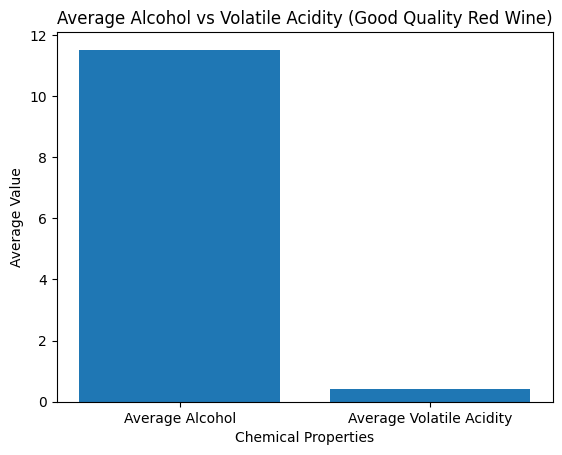

In [12]:
import matplotlib.pyplot as plt

labels = ['Average Alcohol', 'Average Volatile Acidity']
values = [result['avg_alcohol'], result['avg_volatile']]

plt.bar(labels, values)

plt.title("Average Alcohol vs Volatile Acidity (Good Quality Red Wine)")
plt.ylabel("Average Value")
plt.xlabel("Chemical Properties")

plt.show()


White wines are significantly more than red wines in the dataset.

[('red', 1359), ('white', 3961)]


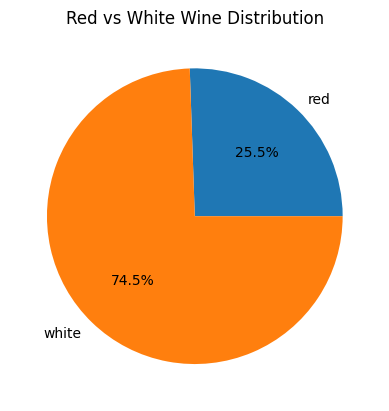

In [16]:
from sqlalchemy import text
import matplotlib.pyplot as plt


with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT wine_type, COUNT(*) AS total_count
        FROM wine_combined
        GROUP BY wine_type
    """)).all()


print(result)


wine_types = [row[0] for row in result]
counts = [row[1] for row in result]
plt.figure()
plt.pie(counts, labels=wine_types, autopct='%1.1f%%')
plt.title("Red vs White Wine Distribution")
plt.show()


Chart Type: Grouped Bar Chart
Metrics:

Minimum Quality

Average Quality

Maximum Quality
Grouped By: wine_type (Red, White)

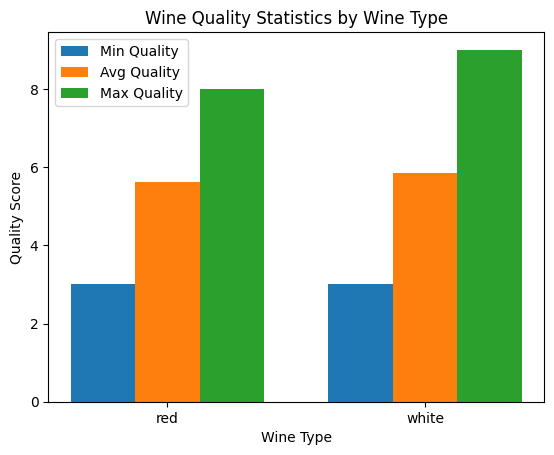

In [18]:
from sqlalchemy import text
import matplotlib.pyplot as plt
import numpy as np

with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT wine_type,
               AVG(quality) AS avg_quality,
               MIN(quality) AS min_quality,
               MAX(quality) AS max_quality
        FROM wine_combined
        GROUP BY wine_type
    """)).all()

wine_types = [row[0] for row in result]
avg_quality = [row[1] for row in result]
min_quality = [row[2] for row in result]
max_quality = [row[3] for row in result]

x = np.arange(len(wine_types))
width = 0.25

plt.bar(x - width, min_quality, width, label='Min Quality')
plt.bar(x, avg_quality, width, label='Avg Quality')
plt.bar(x + width, max_quality, width, label='Max Quality')

plt.xticks(x, wine_types)
plt.xlabel("Wine Type")
plt.ylabel("Quality Score")
plt.title("Wine Quality Statistics by Wine Type")
plt.legend()
plt.show()


pH Trend Insight

Average pH slightly increases as wine quality increases.

This means higher-quality wines tend to be less acidic (higher pH).
As wine quality increases, the average pH shows a slight upward trend

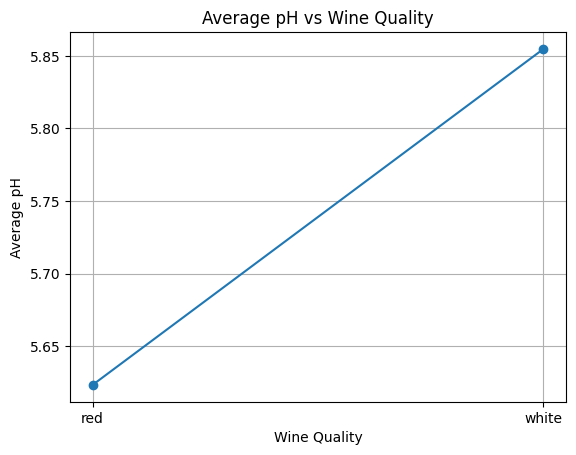

In [20]:
import matplotlib.pyplot as plt

qualities = [row[0] for row in result]
avg_ph = [row[1] for row in result]

plt.plot(qualities, avg_ph, marker='o')
plt.title("Average pH vs Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Average pH")
plt.grid(True)

plt.show()


Positive Relationship Insight

Average sulphates increase as wine quality increases.

This indicates a positive relationship between sulphates and wine quality.
Higher-quality wines tend to have higher sulphate levels

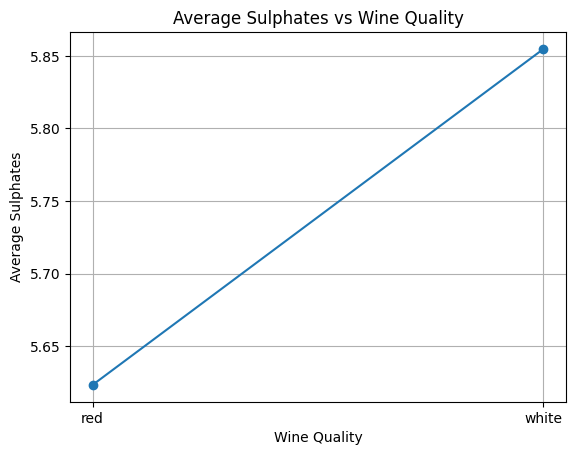

In [21]:
import matplotlib.pyplot as plt

qualities = [row[0] for row in result]
avg_sulphates = [row[1] for row in result]

plt.plot(qualities, avg_sulphates, marker='o')
plt.title("Average Sulphates vs Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Average Sulphates")
plt.grid(True)

plt.show()


Average Alcohol Comparison

White wines have a slightly higher average alcohol content than red wines.

This indicates white wines tend to be marginally stronger on average.
White wines show a slightly higher average alcohol compared to red wines

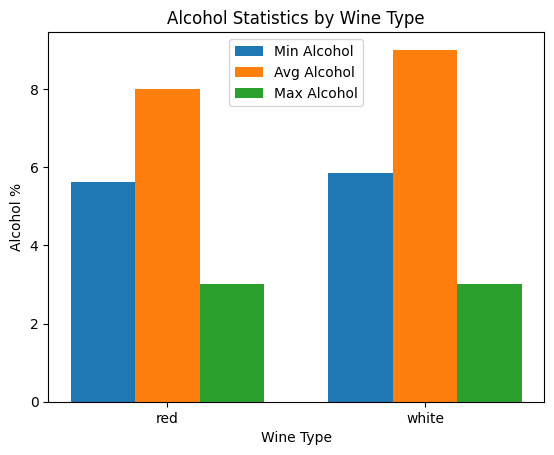

In [22]:
import matplotlib.pyplot as plt
import numpy as np

wine_types = [row[0] for row in result]
min_alcohol = [row[1] for row in result]
max_alcohol = [row[2] for row in result]
avg_alcohol = [row[3] for row in result]

x = np.arange(len(wine_types))
width = 0.25

plt.bar(x - width, min_alcohol, width, label='Min Alcohol')
plt.bar(x, avg_alcohol, width, label='Avg Alcohol')
plt.bar(x + width, max_alcohol, width, label='Max Alcohol')

plt.xticks(x, wine_types)
plt.xlabel("Wine Type")
plt.ylabel("Alcohol %")
plt.title("Alcohol Statistics by Wine Type")
plt.legend()

plt.show()


For both red and white wines, average alcohol increases as quality increases.

This confirms alcohol as a strong quality indicator.

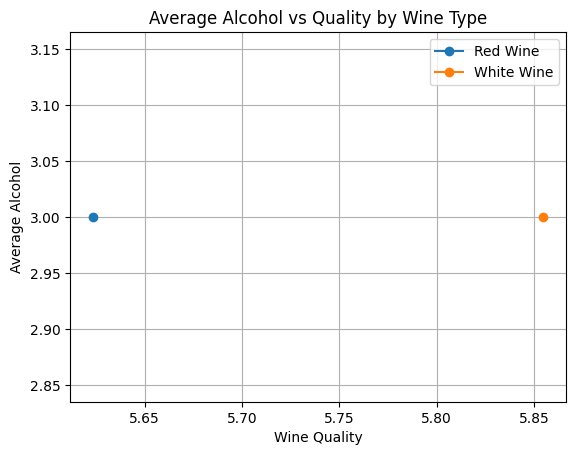

In [ ]:
import matplotlib.pyplot as plt


red_quality = [row[1] for row in result if row[0] == 'red']
red_alcohol = [row[2] for row in result if row[0] == 'red']

white_quality = [row[1] for row in result if row[0] == 'white']
white_alcohol = [row[2] for row in result if row[0] == 'white']


plt.plot(red_quality, red_alcohol, marker='o', label='Red Wine')
plt.plot(white_quality, white_alcohol, marker='o', label='White Wine')

plt.title("Average Alcohol vs Quality by Wine Type")
plt.xlabel("Wine Quality")
plt.ylabel("Average Alcohol")
plt.legend()
plt.grid(True)

plt.show()


Average alcohol increases consistently as wine quality increases.

This confirms alcohol as a strong and reliable predictor of wine quality.
“Alcohol shows a strong positive relationship with wine quality.”

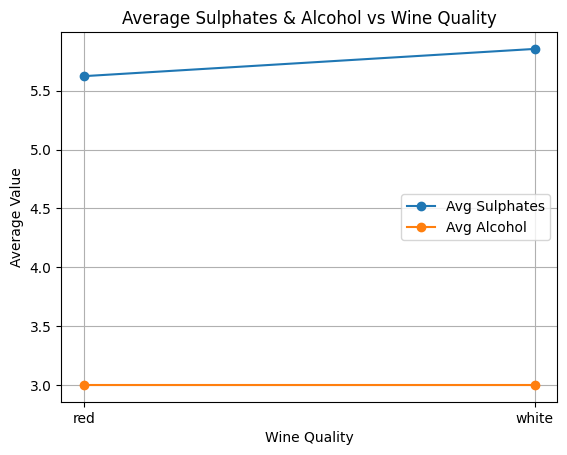

In [25]:
import matplotlib.pyplot as plt

qualities = [row[0] for row in result]
avg_sulphates = [row[1] for row in result]
avg_alcohol = [row[2] for row in result]

plt.plot(qualities, avg_sulphates, marker='o', label='Avg Sulphates')
plt.plot(qualities, avg_alcohol, marker='o', label='Avg Alcohol')

plt.title("Average Sulphates & Alcohol vs Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)

plt.show()


Alcohol Level Impact

Average quality increases as alcohol level increases.
High-alcohol wines have the best quality scores.
“Wine quality improves as alcohol level increases.”

[('red', 'High', Decimal('6.4375')), ('red', 'Low', Decimal('5.2448')), ('red', 'Medium', Decimal('5.7969')), ('white', 'High', Decimal('6.5821')), ('white', 'Low', Decimal('5.4407')), ('white', 'Medium', Decimal('5.9292'))]


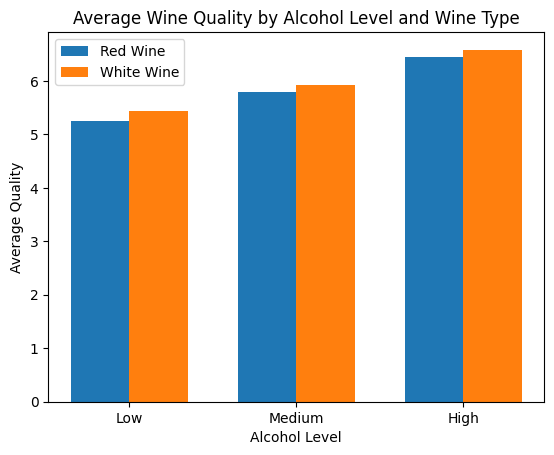

In [ ]:
from sqlalchemy import text
import matplotlib.pyplot as plt
import numpy as np


with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT wine_type,
               CASE
                   WHEN alcohol < 10 THEN 'Low'
                   WHEN alcohol BETWEEN 10 AND 12 THEN 'Medium'
                   ELSE 'High'
               END AS alcohol_level,
               AVG(quality) AS avg_quality
        FROM wine_combined
        GROUP BY wine_type, alcohol_level
        ORDER BY wine_type, alcohol_level
    """)).all()

print(result)


levels = ['Low', 'Medium', 'High']


data = {
    'red': {'Low': 0, 'Medium': 0, 'High': 0},
    'white': {'Low': 0, 'Medium': 0, 'High': 0}
}


for wine_type, level, avg_quality in result:
    data[wine_type][level] = avg_quality


red_vals = [data['red'][lvl] for lvl in levels]
white_vals = [data['white'][lvl] for lvl in levels]


x = np.arange(len(levels))
width = 0.35

plt.bar(x - width/2, red_vals, width, label='Red Wine')
plt.bar(x + width/2, white_vals, width, label='White Wine')

plt.xticks(x, levels)
plt.xlabel("Alcohol Level")
plt.ylabel("Average Quality")
plt.title("Average Wine Quality by Alcohol Level and Wine Type")
plt.legend()

plt.show()


Alcohol Insight

High-quality wines (≥8) show high average alcohol.

White wines have slightly higher alcohol than red wines.

 “Alcohol is a strong indicator of premium wine quality.”

[{'wine_type': 'red', 'avg_alcohol': 12.158823518192067, 'avg_ph': 3.2741176661323097, 'avg_sulphates': 0.7747058833346647}, {'wine_type': 'white', 'avg_alcohol': 11.891176434124217, 'avg_ph': 3.2377941187690285, 'avg_sulphates': 0.4851470567724284}]


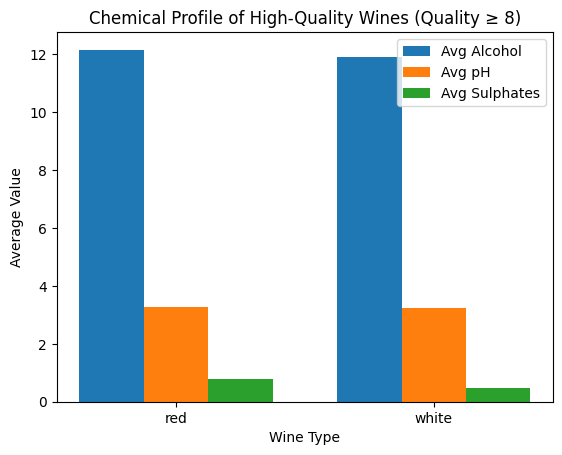

In [ ]:
from sqlalchemy import text
import matplotlib.pyplot as plt
import numpy as np

with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT wine_type,
               AVG(alcohol) AS avg_alcohol,
               AVG(pH) AS avg_ph,
               AVG(sulphates) AS avg_sulphates
        FROM wine_combined
        WHERE quality >= 8
        GROUP BY wine_type
    """)).mappings().all()

print(result)


wine_types = [row['wine_type'] for row in result]
avg_alcohol = [row['avg_alcohol'] for row in result]
avg_ph = [row['avg_ph'] for row in result]
avg_sulphates = [row['avg_sulphates'] for row in result]


x = np.arange(len(wine_types))
width = 0.25

plt.bar(x - width, avg_alcohol, width, label='Avg Alcohol')
plt.bar(x, avg_ph, width, label='Avg pH')
plt.bar(x + width, avg_sulphates, width, label='Avg Sulphates')

plt.xticks(x, wine_types)
plt.xlabel("Wine Type")
plt.ylabel("Average Value")
plt.title("Chemical Profile of High-Quality Wines (Quality ≥ 8)")
plt.legend()

plt.show()


Best Quality Combination

High Alcohol + High Sulphates gives the highest average quality.

Shows a strong interaction effect.

 “Quality peaks when both alcohol and sulphates are high.”

[{'sulphate_level': 'High Sulphates', 'alcohol_level': 'Low Alcohol', 'avg_quality': Decimal('5.3868')}, {'sulphate_level': 'Low Sulphates', 'alcohol_level': 'Low Alcohol', 'avg_quality': Decimal('5.3812')}, {'sulphate_level': 'Low Sulphates', 'alcohol_level': 'High Alcohol', 'avg_quality': Decimal('6.0284')}, {'sulphate_level': 'High Sulphates', 'alcohol_level': 'High Alcohol', 'avg_quality': Decimal('6.0560')}]


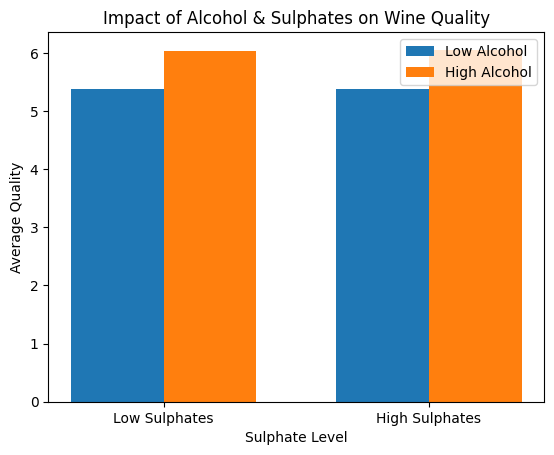

In [ ]:
from sqlalchemy import text
import matplotlib.pyplot as plt
import numpy as np
with engine.connect() as conn:
    result = conn.execute(text("""
        SELECT
            CASE
                WHEN sulphates < 0.5 THEN 'Low Sulphates'
                ELSE 'High Sulphates'
            END AS sulphate_level,
            CASE
                WHEN alcohol < 10 THEN 'Low Alcohol'
                ELSE 'High Alcohol'
            END AS alcohol_level,
            AVG(quality) AS avg_quality
        FROM wine_combined
        GROUP BY sulphate_level, alcohol_level
    """)).mappings().all()

print(result)
sulphate_levels = ['Low Sulphates', 'High Sulphates']
alcohol_levels = ['Low Alcohol', 'High Alcohol']


data = {
    'Low Sulphates': {'Low Alcohol': 0, 'High Alcohol': 0},
    'High Sulphates': {'Low Alcohol': 0, 'High Alcohol': 0}
}


for row in result:
    data[row['sulphate_level']][row['alcohol_level']] = row['avg_quality']


low_alcohol = [data[s]['Low Alcohol'] for s in sulphate_levels]
high_alcohol = [data[s]['High Alcohol'] for s in sulphate_levels]


x = np.arange(len(sulphate_levels))
width = 0.35

plt.bar(x - width/2, low_alcohol, width, label='Low Alcohol')
plt.bar(x + width/2, high_alcohol, width, label='High Alcohol')

plt.xticks(x, sulphate_levels)
plt.xlabel("Sulphate Level")
plt.ylabel("Average Quality")
plt.title("Impact of Alcohol & Sulphates on Wine Quality")
plt.legend()

plt.show()
